In [14]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import math
from IPython import display

from res import plot_data, plot_model, set_default
import matplotlib.pyplot as plt

In [3]:
set_default()

In [4]:

seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [6]:
X = torch.zeros(N * C, D)
y = torch.zeros(N * C, dtype=torch.long)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


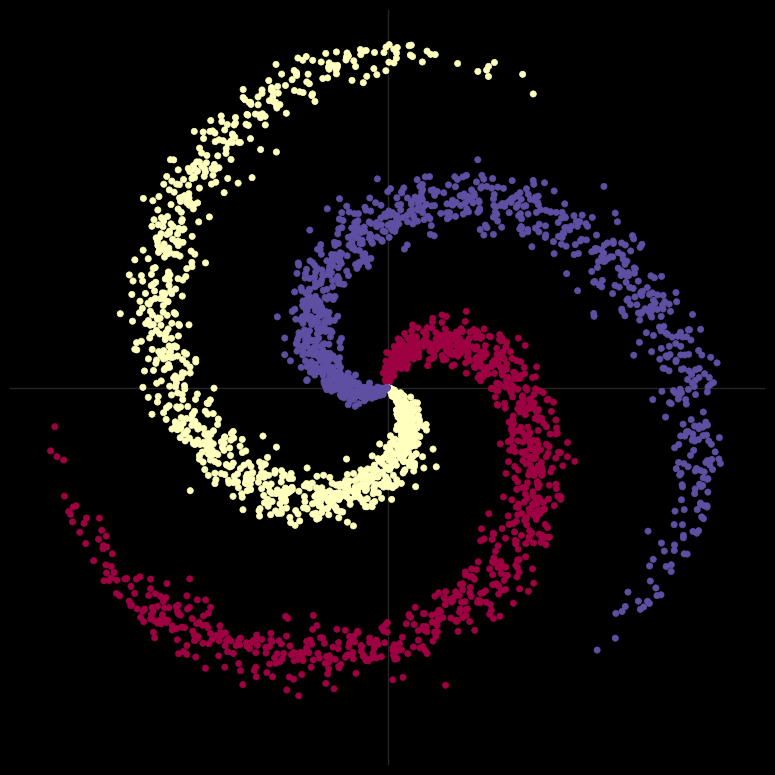

In [11]:
# visualise the data
plot_data(X, y)

In [12]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [55]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

In [56]:
criterion = nn.CrossEntropyLoss()

In [57]:
learning_rate = 1e-3
lambda_l2 = 1e-5
num_epochs = 1000

In [58]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

In [59]:
for epoch in range(num_epochs):
    out = model(X)

    loss = criterion(out, y)

    y_pred = torch.argmax(out.data, -1)
    acc = (y_pred == y).sum().float() / len(y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"Epoch {epoch} Loss {loss.item():.4f} Acc {acc.item():.3f}")
    

Epoch 0 Loss 1.1651 Acc 0.333
Epoch 1 Loss 1.1641 Acc 0.333
Epoch 2 Loss 1.1631 Acc 0.333
Epoch 3 Loss 1.1621 Acc 0.333
Epoch 4 Loss 1.1611 Acc 0.333
Epoch 5 Loss 1.1601 Acc 0.333
Epoch 6 Loss 1.1592 Acc 0.333
Epoch 7 Loss 1.1582 Acc 0.333
Epoch 8 Loss 1.1572 Acc 0.333
Epoch 9 Loss 1.1563 Acc 0.333
Epoch 10 Loss 1.1553 Acc 0.333
Epoch 11 Loss 1.1544 Acc 0.333
Epoch 12 Loss 1.1534 Acc 0.333
Epoch 13 Loss 1.1525 Acc 0.333
Epoch 14 Loss 1.1516 Acc 0.333
Epoch 15 Loss 1.1506 Acc 0.333
Epoch 16 Loss 1.1497 Acc 0.333
Epoch 17 Loss 1.1488 Acc 0.333
Epoch 18 Loss 1.1479 Acc 0.333
Epoch 19 Loss 1.1470 Acc 0.333
Epoch 20 Loss 1.1461 Acc 0.333
Epoch 21 Loss 1.1452 Acc 0.333
Epoch 22 Loss 1.1443 Acc 0.333
Epoch 23 Loss 1.1435 Acc 0.333
Epoch 24 Loss 1.1426 Acc 0.333
Epoch 25 Loss 1.1417 Acc 0.333
Epoch 26 Loss 1.1409 Acc 0.333
Epoch 27 Loss 1.1400 Acc 0.333
Epoch 28 Loss 1.1391 Acc 0.333
Epoch 29 Loss 1.1383 Acc 0.333
Epoch 30 Loss 1.1374 Acc 0.333
Epoch 31 Loss 1.1366 Acc 0.333
Epoch 32 Loss 1.13

In [60]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


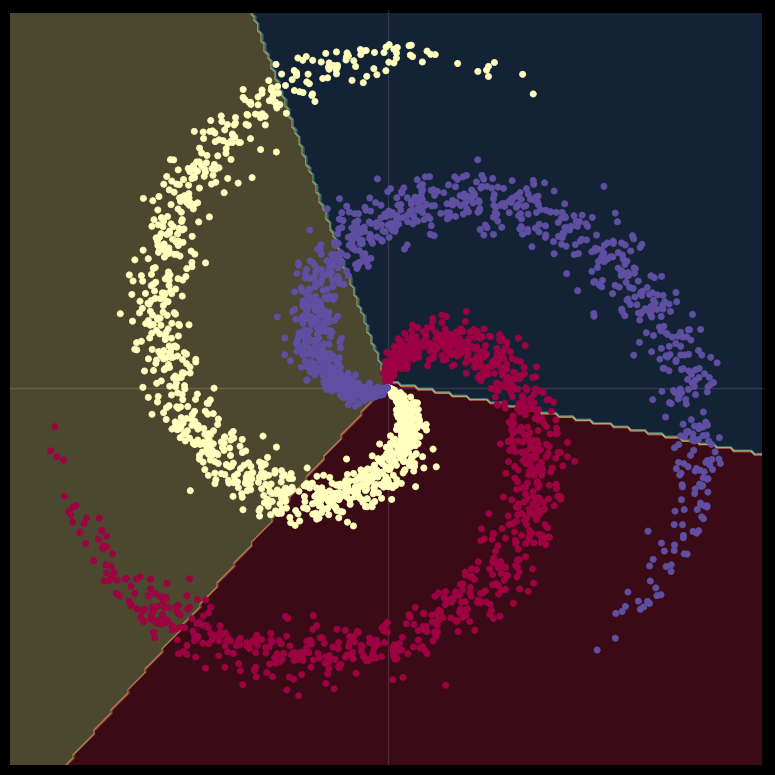

In [62]:
plot_model(X, y, model)

In [67]:
X.min(), X.max()

(tensor(-0.9818), tensor(0.9990))

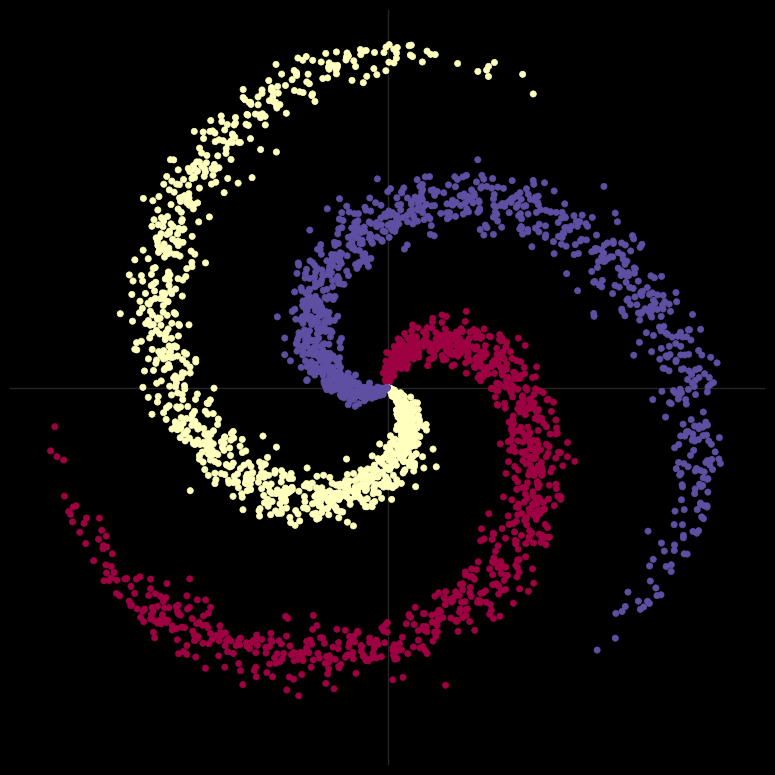

In [70]:
plot_data(X, y)

In [104]:
mesh = torch.linspace(-1.1, 1.1, 1000)
xx1, xx2 = torch.meshgrid(mesh, mesh)

In [105]:
mesh_data = torch.stack((xx1.flatten(), xx2.flatten()))

In [106]:
yy_hat = model(mesh_data.T)

In [107]:
yy_pred = torch.argmax(yy_hat, -1)

In [108]:
yy_pred_reshaped = yy_pred.reshape(xx1.shape[0], -1)

In [109]:
yy_pred

tensor([1, 1, 1,  ..., 2, 2, 2])

In [110]:
yy_pred_reshaped.shape

torch.Size([1000, 1000])

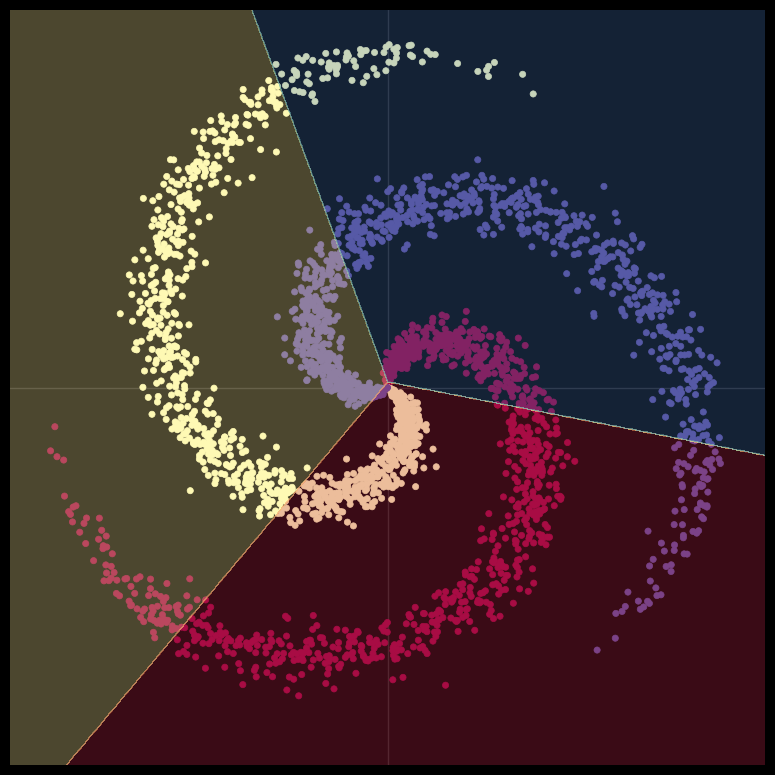

In [111]:
plot_data(X, y)
plt.contourf(xx1, xx2, yy_pred_reshaped, cmap=plt.cm.Spectral, alpha=0.3)